In [9]:
import numpy as np
from tqdm import tqdm
from scipy.stats import norm
from scipy.integrate import quad, simps
%matplotlib inline
import matplotlib.pyplot as plt

__Задание 1__

__Задание 2__

Пусть $\xi \sim N(0, 1)$ и $\eta \sim \dfrac12 \bigg(N(\mu, 1) + N(-\mu, 1)\bigg)$. Будем считать, что складываются плотности, иначе смысла особо нет, так как пропадет зависимоть от $\mu$. 
$$
f(x) = \rho_\xi(x)\qquad g(x) = \rho_\eta(x)
$$

In [10]:
def make_f():
    def f(x):
        return norm.pdf(x, loc=0, scale=1)
    return f
    
def make_g(mu):
    def g(x):
        return (norm.pdf(x, loc=mu, scale=1) + norm.pdf(x, loc=-mu, scale=1)) / 2
    return g

In [32]:
def kl_distance(f, g, x):
    def integrate_function(x):
        return f(x) * (np.log(f(x)) - np.log(g(x)))
    return simps(integrate_function(x), x)

def chi2_distance(f, g, x):
    def integrate_function(x):
        return (f(x) - g(x))**2 / f(x)
    return simps(integrate_function(x), x)

def full_variation_distance(f, g, x):
    def integrate_function(x):
        return np.abs(f(x) - g(x)) / 2
    return simps(integrate_function(x), x)

In [39]:
x_density = np.linspace(-10, 10, 10000)
distances_f = [kl_distance, chi2_distance, full_variation_distance]
mus_x = np.linspace(-1, 1, 1000)
mus_y = np.zeros((len(distances_f), len(mus_x)))
for i, mu in tqdm(enumerate(mus)):
    f = make_f()
    g = make_g(mu)
    for k, f_dist in enumerate(distances_f):
        mus_y[k, i] = f_dist(f, g, x_density)

1000it [00:10, 91.05it/s]


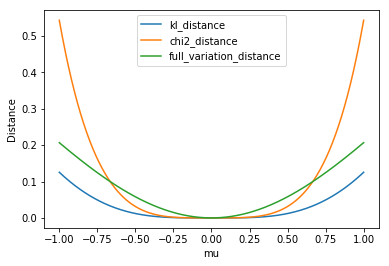

In [44]:
for i in range(len(distances_f)):
    plt.plot(mus_x, mus_y[i], label=distances_f[i].__name__)
plt.xlabel('mu')
plt.ylabel('Distance')
plt.legend()